<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/workshop_4/Jupyter-notebooks/2-6factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More analysis of the six-Factor Full Factorial Design

## Introduction
Let us continue where we ended in Task 2. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

seed(10)

## Two-Level Six-Factor Full Factorial Design
First, let's recover the data from Task 2. 

In [2]:
import itertools

# Create the inputs:
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1]) )

# Create the experiment design table:
doe = pd.DataFrame(encoded_inputs,columns=['x%d'%(i+1) for i in range(6)])

doe['y1'] = doe.apply( lambda z : sum([ rand()*z["x%d"%(i)]+0.01*(0.5-rand()) for i in range(1,7) ]), axis=1)
doe['y2'] = doe.apply( lambda z : sum([ 5*rand()*z["x%d"%(i)]+0.01*(0.5-rand()) for i in range(1,7) ]), axis=1)
doe['y3'] = doe.apply( lambda z : sum([ 100*rand()*z["x%d"%(i)]+0.01*(0.5-rand()) for i in range(1,7) ]), axis=1)
print(doe[['y1','y2','y3']])

# Defining Variables and Variable Labels

labels = {}
labels[1] = ['x1','x2','x3','x4','x5','x6']
for i in [2,3,4,5,6]:
    labels[i] = list(itertools.combinations(labels[1], i))

obs_list = ['y1','y2','y3']

for k in labels.keys():
    print(str(k) + " : " + str(labels[k]))

          y1         y2          y3
0  -2.953976 -16.995589 -229.814820
1  -2.624777 -14.558143 -165.701057
2  -1.693929 -13.034991 -237.887785
3  -0.277497  -7.319593 -188.562237
4  -2.959396 -16.067548 -243.198515
..       ...        ...         ...
59  2.794374  10.913180  225.621205
60  1.087903   6.553223  255.150465
61  2.440223  15.495756  223.083850
62  1.162720  12.011973   68.035610
63  3.291962  14.972866  161.953919

[64 rows x 3 columns]
1 : ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
2 : [('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x1', 'x5'), ('x1', 'x6'), ('x2', 'x3'), ('x2', 'x4'), ('x2', 'x5'), ('x2', 'x6'), ('x3', 'x4'), ('x3', 'x5'), ('x3', 'x6'), ('x4', 'x5'), ('x4', 'x6'), ('x5', 'x6')]
3 : [('x1', 'x2', 'x3'), ('x1', 'x2', 'x4'), ('x1', 'x2', 'x5'), ('x1', 'x2', 'x6'), ('x1', 'x3', 'x4'), ('x1', 'x3', 'x5'), ('x1', 'x3', 'x6'), ('x1', 'x4', 'x5'), ('x1', 'x4', 'x6'), ('x1', 'x5', 'x6'), ('x2', 'x3', 'x4'), ('x2', 'x3', 'x5'), ('x2', 'x3', 'x6'), ('x2', 'x4', 'x5'), ('x2

Now that we have variable labels for each main effect and interaction effect, we can actually compute those effects.

## Utilizing Degrees of Freedom
Our very expensive, 64-experiment full factorial design (the data for which maps  (x$_1$,x$_2$,…,x$_6$) to (y$_1$,y$_2$,y$_3$) gives us 64 data points, and 64 degrees of freedom. What we do with those 64 degrees of freedom is up to us.

We could fit an empirical model, or response surface, that has 64 independent parameters, and account for many of the high-order interaction terms - all the way up to six-variable interaction effects. However, high-order effects are rarely important, and are a waste of our degrees of freedom.

Alternatively, we can fit an empirical model with fewer coefficients, using up fewer degrees of freedom, and use the remaining degrees of freedom to characterize the error introduced by our approximate model.

To describe a model with the 6 variables listed above and no other variable interaction effects would use only 6 degrees of freedom, plus 1 degree of freedom for the constant term, leaving 57 degrees of freedom available to quantify error, attribute variance, etc.

Our goal is to use least squares to compute model equations for  (y$_1$,y$_2$,y$_3$)
  as functions of  (x$_1$,x$_2$,x$_3$,x$_4$,x$_5$,x$_6$)
 .

In [3]:
xlabs = ['x1','x2','x3','x4','x5','x6']
ylabs = ['y1','y2','y3']
ls_data = doe[xlabs+ylabs]

In [4]:
import statsmodels.api as sm
import numpy as np

x = ls_data[xlabs]
x = sm.add_constant(x)

The first ordinary least squares linear model is created to predict values of the first variable,  y$_1$, as a function of each of our input variables, the list of which are contained in the xlabs variable. When we perform the linear regression fitting, we see much of the same information that we found in the prior two-level three-factor full factorial design, but here, everything is done automatically.

The model is linear, meaning it's fitting the coefficients of the function:
\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3+x_3+a_4x_4+a_5x_5+a_6x_6
\end{equation} 
(here, the variables y and x are vectors, with one component for each response; in our case, they are three-dimensional vectors.)

Because there are 64 observations and 7 coefficients, the 57 extra observations give us extra degrees of freedom with which to assess how good the model is. That analysis can be done with an ordinary least squares (OLS) model, available through the statsmodel library in Python.

## Ordinary Least Squares Regression Model
This built-in OLS model will fit an input vector  (x$_1$,x$_2$,x$_3$,x$_4$,x$_5$,x$_6$)
  to an output vector  (y$_1$,y$_2$,y$_3$)
  using a linear model; the OLS model is designed to fit the model with more observations than coefficients, and utilize the remaining data to quantify the fit of the model.

Let's run through one of these, and analyze the results:

In [5]:
y1 = ls_data['y1']
est1 = sm.OLS(y1,x).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     29.96
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           6.28e-16
Time:                        08:42:25   Log-Likelihood:                -62.028
No. Observations:                  64   AIC:                             138.1
Df Residuals:                      57   BIC:                             153.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2143      0.084      2.537      0.0

The StatsModel OLS object prints out quite a bit of useful information, in a nicely-formatted table. Starting at the top, we see a couple of important pieces of information: specifically, the name of the dependent variable (the response) that we're looking at, the number of observations, and the number of degrees of freedom.

We can see an  R$^2$ statistic, which indicates how well this data is fit with our linear model, and an adjusted R$^2$
  statistic, which accounts for the large nubmer of degrees of freedom. While an adjusted R$^2$
  of 0.73 is not great, we have to remember that this linear model is trying to capture a wealth of complexity in six coefficients. Furthermore, the adjusted  R$^2$
  value is too broad to sum up how good our model actually is.

The table in the middle is where the most useful information is located. The coef column shows the coefficients  a$_0$,a$_1$,a$_2$,…
  for the model equation:
\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3+x_3+a_4x_4+a_5x_5+a_6x_6
\end{equation}
 
Using the extra degrees of freedom, an estime s$^2$
  of the variance in the regression coefficients is also computed, and reported in the the std err column. Each linear term is attributed the same amount of variance,  ±0.082
 .

In [6]:
y2 = ls_data['y2']
est2 = sm.OLS(y2,x).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     47.06
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.61e-20
Time:                        08:42:49   Log-Likelihood:                -159.57
No. Observations:                  64   AIC:                             333.1
Df Residuals:                      57   BIC:                             348.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3407      0.388     -0.878      0.3

In [7]:
y3 = ls_data['y3']
est3 = sm.OLS(y3,x).fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     23.72
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           7.57e-14
Time:                        08:42:52   Log-Likelihood:                -364.01
No. Observations:                  64   AIC:                             742.0
Df Residuals:                      57   BIC:                             757.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3109      9.461     -0.033      0.9

## Quantifying Model Goodness-of-Fit
We can now use these linear models to evaluate each set of inputs and compare the model response  $\hat{y}$ to the actual observed response y. What we would expect to see, if our model does an adequate job of representing the underlying behavior of the model, is that in each of the 64 experiments, the difference between the model prediction M and the measured data d, defined as the residual r, r=|d−M|, should be comparable across all experiments. If the residuals appear to have functional dependence on the input variables, it is an indication that our model is missing important effects and needs more or different terms. The way we determine this, mathematically, is by looking at a quantile-quantile plot of our errors (that is, a ranked plot of our error magnitudes).

If the residuals are normally distributed, they will follow a straight line; if the plot shows the data have significant wiggle and do not follow a line, it is an indication that the errors are not normally distributed, and are therefore skewed (indicating terms missing from our OLS model).

Text(0.5, 1.0, 'Residuals, y3')

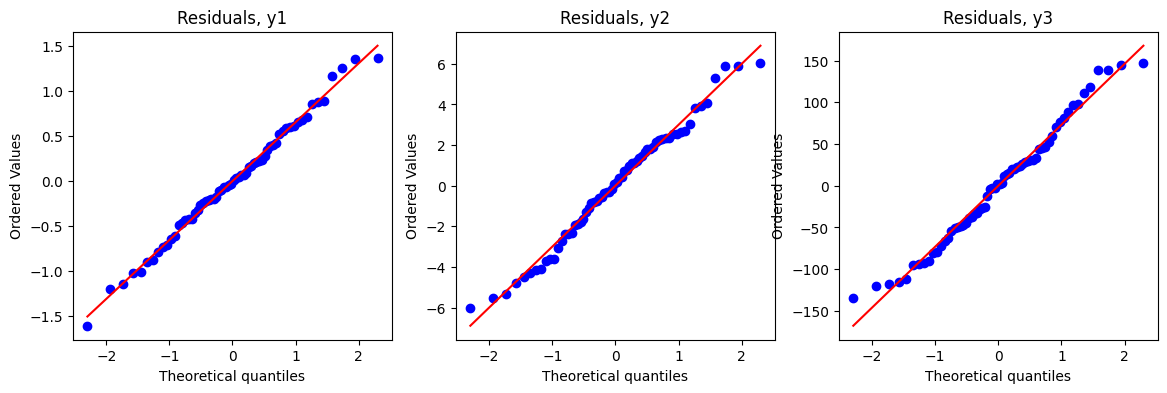

In [8]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

# Quantify goodness of fit

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

r1 = y1 - est1.predict(x)
r2 = y2 - est2.predict(x)
r3 = y3 - est3.predict(x)

stats.probplot(r1, dist="norm", plot=ax1)
ax1.set_title('Residuals, y1')

stats.probplot(r2, dist="norm", plot=ax2)
ax2.set_title('Residuals, y2')

stats.probplot(r3, dist="norm", plot=ax3)
ax3.set_title('Residuals, y3')

Determining whether significant trends are being missed by the model depends on how many points deviate from the red line, and how significantly. If there is a single point that deviates, it does not necessarily indicate a problem; but if there is significant wiggle and most points deviate significantly from the red line, it means that there is something about the relationship between the inputs and the outputs that our model is missing.

There are only a few points deviating from the red line. We saw from the effect quantile for y$_3$
  that there was an interaction variable that was important to modeling the response  y$_3$
 , and it is likely this interaction that is leading to noise at the tail end of these residuals. This indicates residual errors (deviations of the model from data) that do not follow a natural, normal distribution, which indicates there is a pattern in the deviations - namely, the interaction effect.

The conclusion about the error from the quantile plots above is that there are only a few points deviation from the line, and no particularly significant outliers. Our model can use some improvement, but it's a pretty good first-pass model.

## Distribution of Error
Another thing we can look at is the normalized error: what are the residual errors (differences between our model prediction and our data)? How are their values distributed?

A kernel density estimate (KDE) plot, which is a smoothed histogram, shows the probability distribution of the normalized residual errors. As expected, they're bunched pretty close to zero. There are some bumps far from zero, corresponding to the outliers on the quantile-quantile plot of the errors above. However, they're pretty close to randomly distributed, and therefore it doesn't look like there is any systemic bias there.

C:\Users\petbr908\AppData\Local\Temp\ipykernel_7648\1493016482.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);
C:\Users\petbr908\AppData\Local\Temp\ipykernel_7648\1493016482.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);
C:\Users\petbr908\AppData\Local\Temp\ipykernel_7648\1493016482.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);


Text(0.5, 1.0, 'Normalized Residual Error, y3')

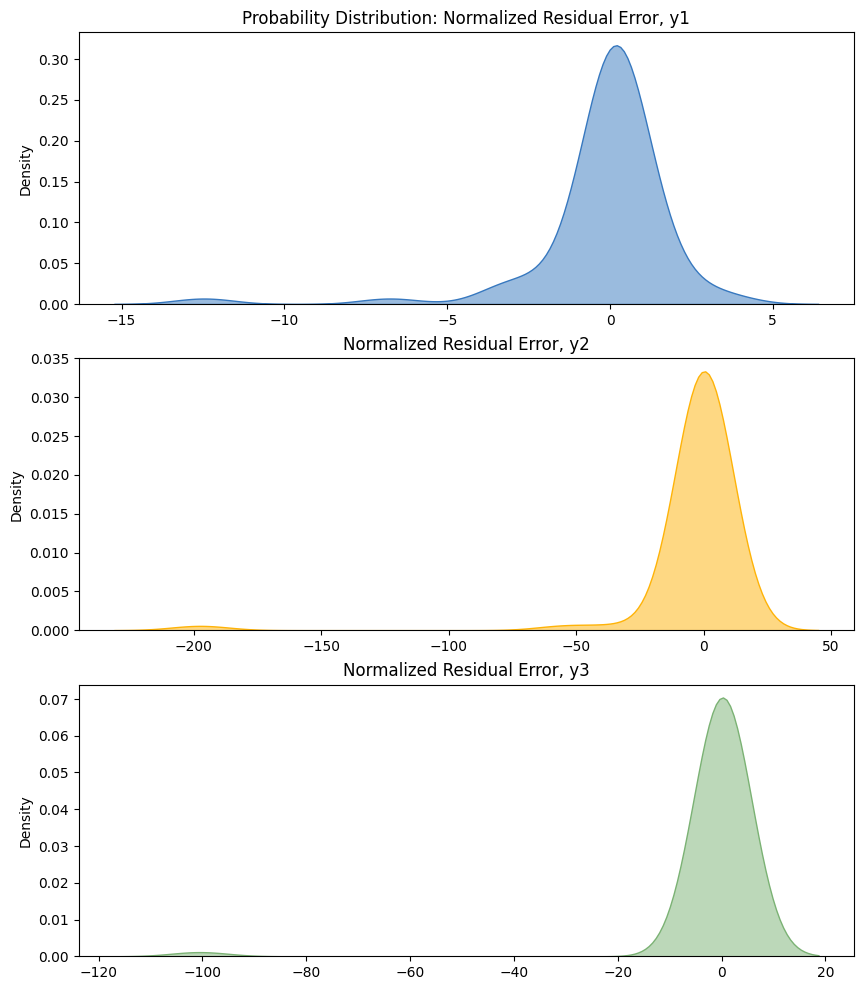

In [9]:
fig = figure(figsize=(10,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
axes = [ax1,ax2,ax3]

colors = sns.xkcd_palette(["windows blue", "amber", "faded green", "dusty purple","aqua blue"])

#resids = [r1, r2, r3]
normed_resids = [r1/y1, r2/y2, r3/y3]

for (dataa, axx, colorr) in zip(normed_resids,axes,colors):
    sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);

ax1.set_title('Probability Distribution: Normalized Residual Error, y1')
ax2.set_title('Normalized Residual Error, y2')
ax3.set_title('Normalized Residual Error, y3')

Note that in these figures, the bumps at extreme value are caused by the fact that the interval containing the responses includes 0 and values close to 0, so the normalization factor is very tiny, leading to large values.

## Aggregating Results
Let's next aggregate experimental results, by taking the mean over various variables to compute the mean effect for regressed varables. For example, we may want to look at the effects of variables 2, 3, and 4, and take the mean over the other three variables.

This is simple to do with Pandas, by grouping the data by each variable, and applying the mean function on all of the results. The code looks like this:

In [10]:
# Our original regression variables
xlabs = ['x2','x3','x4']
doe.groupby(xlabs)[ylabs].mean()

y1        y2          y3
x2 x3 x4                                
-1 -1 -1 -1.312180 -8.231421 -158.966973
       1 -0.538437 -2.991776  -42.718649
    1 -1 -0.153627 -3.200942  -36.608578
       1  0.537974  2.480359   59.101506
 1 -1 -1  0.021285 -2.700483  -53.775986
       1  0.666955  0.781796   18.257844
    1 -1  0.887720  4.144010   60.425290
       1  1.605047  6.992705  151.798186

In [11]:
# If we decided to go for a different variable set
xlabs = ['x2','x3','x4','x6']
doe.groupby(xlabs)[ylabs].mean()

y1         y2          y3
x2 x3 x4 x6                                 
-1 -1 -1 -1 -1.467098 -11.634463 -177.465836
          1 -1.157263  -4.828380 -140.468110
       1 -1 -1.124934  -4.519789  -90.787481
          1  0.048060  -1.463762    5.350184
    1 -1 -1 -0.901130  -6.008022  -53.864545
          1  0.593876  -0.393863  -19.352612
       1 -1  0.285655   0.099799   -9.012942
          1  0.790293   4.860920  127.215955
 1 -1 -1 -1 -0.231442  -5.478294  -92.851874
          1  0.274012   0.077328  -14.700099
       1 -1  0.105898  -0.728904  -39.621122
          1  1.228013   2.292495   76.136811
    1 -1 -1  0.318023   0.177202    5.502191
          1  1.457417   8.110817  115.348390
       1 -1  1.090399   3.962919  115.316461
          1  2.119695  10.022492  188.279910

This functionality can also be used to determine the variance in all of the experimental observations being aggregated. For example, here we aggregate over  x$_3$-x$_6$ and show the variance broken down by  x$_1$,x$_2$
  vs  y$_1$,y$_2$,y$_3$
 .

In [12]:
xlabs = ['x1','x2']
doe.groupby(xlabs)[ylabs].var()

y1         y2            y3
x1 x2                                   
-1 -1  1.688944  48.644180  11048.732564
    1  1.144894  27.506487  20550.899895
 1 -1  0.992189  33.485163  15883.558781
    1  0.993779  51.531576  12424.563466

Or even the number of experimental observations being aggregated!

In [13]:
doe.groupby(xlabs)[ylabs].count()

y1  y2  y3
x1 x2            
-1 -1  16  16  16
    1  16  16  16
 1 -1  16  16  16
    1  16  16  16

## Distributions of Variance
We can convert these dataframes of averages, variances, and counts into data for plotting. For example, if we want to make a histogram of every value in the groupby dataframe, we can use the .values method, so that this:
´´´
doe.gorupby(xlabs)[ylabs].mean()
´´´
becomes this:

doe.groupby(xlabs)[ylabs].mean().values


This  M×N
  array can then be flattened into a vector using the ravel() method from numpy:

np.ravel( doe.groupby(xlabs)[ylabs].mean().values )

The resulting data can be used to generate histograms, as shown below:

Grouping responses by x1-x2-x3-x4


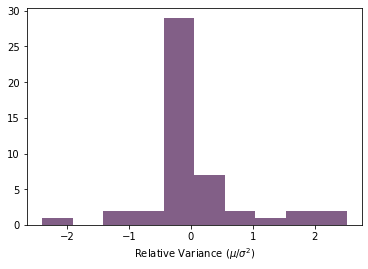

In [60]:
# Histogram of means of response values, grouped by xlabs

xlabs = ['x1','x2','x3','x4']

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)[ylabs].mean().values) / np.ravel(doe.groupby(xlabs)[ylabs].var().values)

hist(dat, 10, color=colors[3]);
xlabel(r'Relative Variance ($\mu$/$\sigma^2$)')
show()

Grouping responses by x1-x2-x3-x4


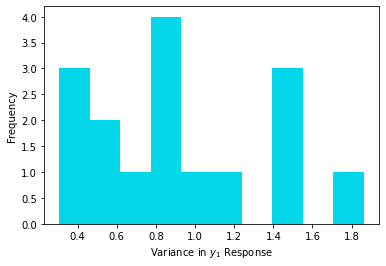

In [59]:
# Histogram of variances of response values, grouped by xlabs

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)['y1'].var().values)

hist(dat, color=colors[4])
xlabel(r'Variance in $y_{1}$ Response')
ylabel(r'Frequency')
show()

The distribution of variance looks mostly normal, with some outliers. These are the same outliers that showed up in our quantile-quantile plot, and they'll show up in the plots below as well.

## Residual vs. Response Plots
Another thing we can do, to look for uncaptured effects, is to look at our residuals vs.  $\hat{y}$. This is a further effort to look for underlying functional relationships between  $\hat{y}$
  and the residuals, which would indicate that our system exhibits behavior not captured by our linear model.

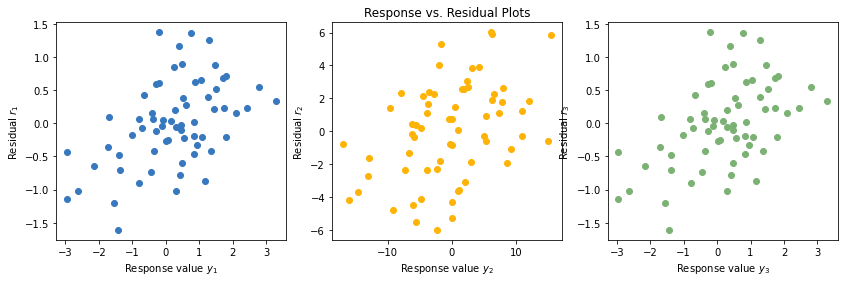

In [58]:
# normal plot of residuals

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(y1,r1,'o',color=colors[0])
ax1.set_xlabel('Response value $y_1$')
ax1.set_ylabel('Residual $r_1$')

ax2.plot(y2,r2,'o',color=colors[1])
ax2.set_xlabel('Response value $y_2$')
ax2.set_ylabel('Residual $r_2$')
ax2.set_title('Response vs. Residual Plots')

ax3.plot(y1,r1,'o',color=colors[2])
ax3.set_xlabel('Response value $y_3$')
ax3.set_ylabel('Residual $r_3$')

show()

Notice that each plot is trending up and to the right - indicative of an underlying trend that our model  $\hat{y}$
  is not capturing. The trend is relatively weak, however, indicating that our linear model does a good job of capturing most of the relevant effects of this system.

## Discussion
The analysis shows that there are some higher-order or nonlinear effects in the system that a purely linear model does not account for. Next steps would involve adding higher order points for a quadratic or higher order polynomial model to gather additional data to fit the higher-degree models.